<a href="https://colab.research.google.com/github/Brucethegreat4/phase3-syriaTel_customer_churn/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Understanding**

 - SyriaTel, a telecommunications company, is facing challenges with customer retention. A significant number of customers are churning, leading to revenue loss and increased costs associated with acquiring new customers. Understanding and predicting customer churn is critical for SyriaTel to implement targeted retention strategies, improve customer satisfaction, and ultimately reduce financial losses. By leveraging data analytics and machine learning, SyriaTel can identify patterns and predictors of churn, enabling proactive measures to retain at-risk customers.

**Problem Statement**

- Customer churn is a major issue for SyriaTel, resulting in lost revenue and increased operational costs. Without actionable insights, SyriaTel cannot effectively implement retention strategies, leading to continued customer attrition. The goal is:
 - Predict numerical factors that influence churn, such as service usage,
 customer complaints, or charges.(Regression task)
 -  Predict whether a customer will churn (Classification task)


## **Objectives**

**Primary Objective:**

- Develop a binary classification model to predict whether a customer will churn ("soon") based on historical customer data with high accuracy and reliability

**Secondary Objectives:**

- Identify key factors (features) that contribute to customer churn.

- Provide actionable insights to SyriaTel to design targeted retention strategies.

- Optimize model performance through feature engineering and hyperparameter tuning then
 select the best performing classifier either using F1-score or ROC-AUC.

# Research Questions

 1. What are the most significant factors influencing customer churn?
 2. Does frequent customer service interaction indicate a higher risk of churn?
 3. Do customers with an international plan have a higher churn rate?
 4. Can a machine learning model accurately predict churn using available features?

# **Data understanding**

## **Exploratory Data Analysis**

In [8]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score # Corrected the import to f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [9]:
# load churn.csv dataset
df_churn = pd.read_csv('churn.csv')
df_churn.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [11]:
# statistical overview of the data
df_churn.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
# get the shape
df_churn.shape

(3333, 21)

In [13]:
# check unique values
df_churn.nunique()

,0
state,51
account length,212
area code,3
phone number,3333
international plan,2
voice mail plan,2
number vmail messages,46
total day minutes,1667
total day calls,119
total day charge,1667


# Data Preparation

In [14]:
# correct format to check data types
print(df_churn.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [15]:
# Convert to binary (0 for No, 1 for Yes)
df_churn['international plan'] = df_churn['international plan'].map({'yes': 1, 'no': 0})
df_churn['voice mail plan'] = df_churn['voice mail plan'].map({'yes': 1, 'no': 0})

# Verify changes
print(df_churn[['international plan', 'voice mail plan']].isnull().sum())  # Check for remaining NaN values
df_churn[['international plan', 'voice mail plan']].head()

international plan    0
voice mail plan       0
dtype: int64


,international plan,voice mail plan
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0


convert categorical variables to numerical variables from boolean to integer
- This ensures consistency when training machine learning models and improves model perfomance
-Easier analysis when computing metrics


In [16]:
#Run data types again to confirm the changes
print(df_churn.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [17]:
 #First create contingency tables
state_contingency = pd.crosstab(df_churn['state'], df_churn['churn'])
area_code_contingency = pd.crosstab(df_churn['area code'], df_churn['churn'])
 #Run chi_square test
state_chi2, state_p, state_dof, state_expected = chi2_contingency(state_contingency)
area_code_chi2, area_code_p, area_code_dof, area_code_expected = chi2_contingency(area_code_contingency)
 #Print results
print("State Chi-Square Test:")
print(f"State Chi-Square Statistic: {state_chi2}, p-value: {state_p}")
print(f"Area Code Chi-Square Statistic: {area_code_chi2}, p-value: {area_code_p}")

State Chi-Square Test:
State Chi-Square Statistic: 83.04379191019663, p-value: 0.002296221552011188
Area Code Chi-Square Statistic: 0.17754069117425395, p-value: 0.9150556960243712


 - State vs churn chi-square statistic is 83.4 and p-value of 0.0023 thus < 0.05 showing a
 significant impact on churn meaning we retain the column
 - Area code vs churn chi-square statistic is 0.18, p-value of 0.9151 thus > than 0.05
 showing no significant impact meaning we drop the column

In [18]:
# check for missing values
missing_values = df_churn.isnull().sum()

In [19]:
# check for duplicates
duplicate_rows = df_churn.duplicated().sum()

In [20]:
# unique values of churn data
unique_values = df_churn.nunique()
print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:", duplicate_rows)
print("\nUnique Values per Column:\n", unique_values)

Missing Values:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Duplicate Rows: 0

Unique Values per Column:
 state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes        

Data Cleaning

In [21]:
# Drop irrelevant columns (e.g., 'state' and 'area code' if they exist)
df_churn = df_churn.drop(columns=['state', 'area code', 'phone number'], errors='ignore')

# Standardize numerical features
scaler = StandardScaler()
numerical_features = df_churn.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'churn' in numerical_features:
 numerical_features.remove('churn')
df_churn[numerical_features] = scaler.fit_transform(df_churn[numerical_features])


# Show cleaned data
df_churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.676489,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,False
1,0.149065,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,False
2,0.902529,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,False
3,-0.428590,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,False
4,-0.654629,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,False


# Data visualization and exploratory data analysis

**Univariate Analysis (Single Variable Analysis)**
- Goal: Understand the distribution of individual variables (one at a time).
To analyze categorical variables (like churn, international plan, etc.) and numerical variables (like total day minutes, customer service calls

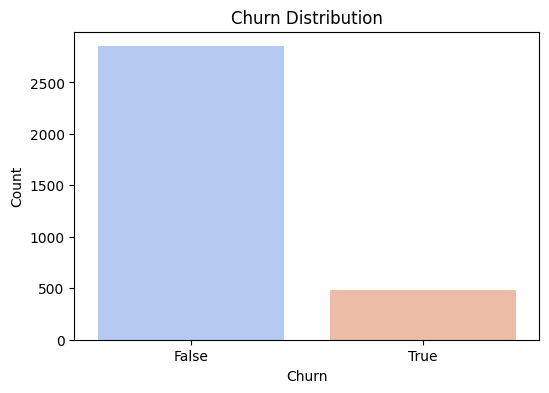

In [22]:
# churn distribution bar chat
plt.figure(figsize=(6,4))
sns.countplot(x=df_churn['churn'], palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

- The bar graph shows that the dataset is imbalanced, with fewer churned customers (1) than non-churned customers (0). This shows that churn is lower in number, the business might not yet have a severe churn issue

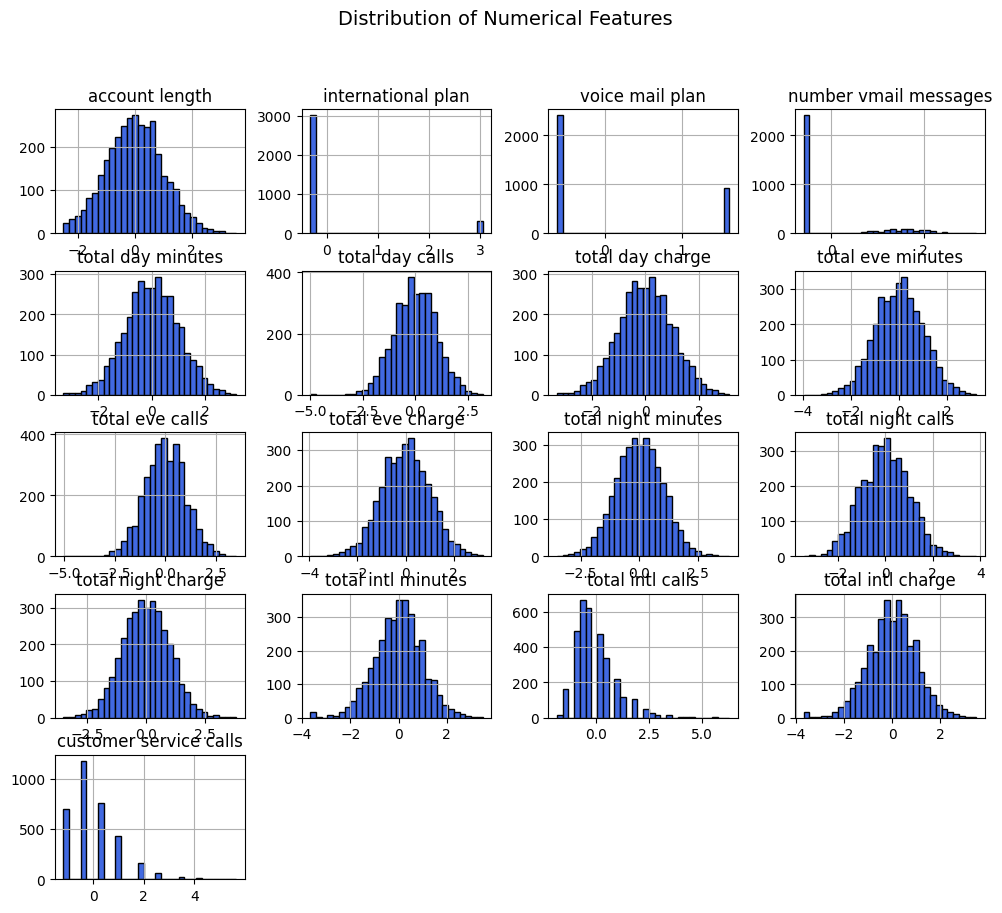

In [23]:
# Plot histograms for numerical columns
df_churn.hist(figsize=(12, 10), bins=30, color='royalblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.show()

- Features like total day minutes, total eve minutes, and total night minutes are normally distributed.
- Customer service calls are right-skewed indicating that most customers make fewer calls.

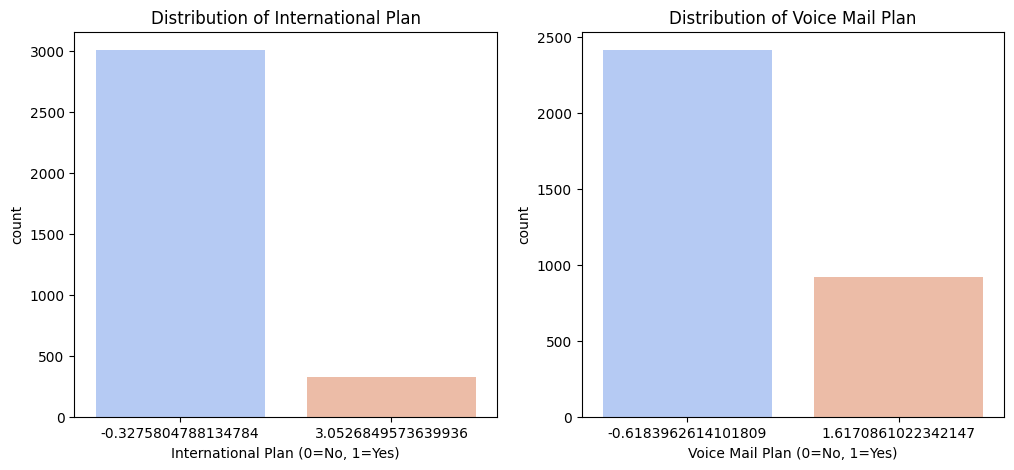

In [24]:
# Categorical variable analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='international plan', data=df_churn, palette='coolwarm', ax=axes[0])
axes[0].set_title("Distribution of International Plan")
axes[0].set_xlabel("International Plan (0=No, 1=Yes)")

sns.countplot(x='voice mail plan', data=df_churn, palette='coolwarm', ax=axes[1])
axes[1].set_title("Distribution of Voice Mail Plan")
axes[1].set_xlabel("Voice Mail Plan (0=No, 1=Yes)")

plt.show()


- Most customers don’t have an international plan or voice mail plan.

**Bivariate Analysis (Two Variables)**
- Goal: Understand the relationship between two variables, especially how features relate to churn.

**Churn vs. Categorical Features (International Plan & Voice Mail Plan)**

- Checking how churn is distributed across categorical features

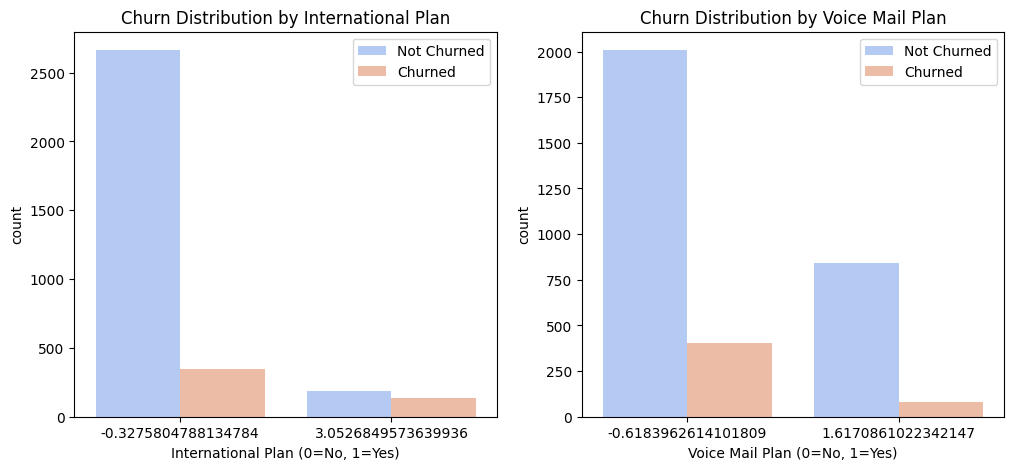

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='international plan', hue='churn', data=df_churn, palette='coolwarm', ax=axes[0])
axes[0].set_title('Churn Distribution by International Plan')
axes[0].set_xlabel('International Plan (0=No, 1=Yes)')
axes[0].legend(['Not Churned', 'Churned'])

sns.countplot(x='voice mail plan', hue='churn', data=df_churn, palette='coolwarm', ax=axes[1])
axes[1].set_title('Churn Distribution by Voice Mail Plan')
axes[1].set_xlabel('Voice Mail Plan (0=No, 1=Yes)')
axes[1].legend(['Not Churned', 'Churned'])

plt.show()


- Customers with an international plan churn more than those without it.
- Voice mail plan does not significantly affect churn..



**Churn vs. Customer Service Calls**
- Do customers who make more service calls churn more?

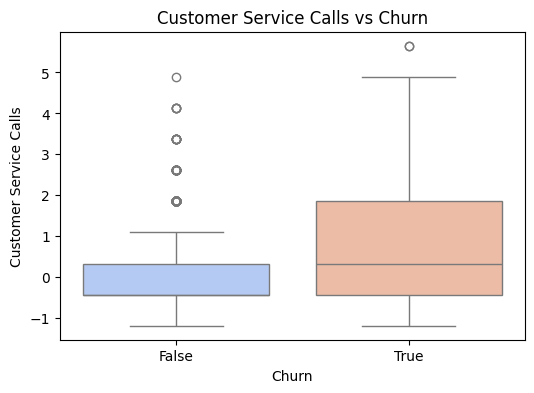

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_churn['churn'], y=df_churn['customer service calls'], palette="coolwarm")
plt.title('Customer Service Calls vs Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()


- Customers who make more customer service calls tend to churn at a higher rate. Frequent service calls may indicate dissatisfaction with the service.

**Churn vs. Total Day Minutes**
- Do customers who talk more during the day churn more?

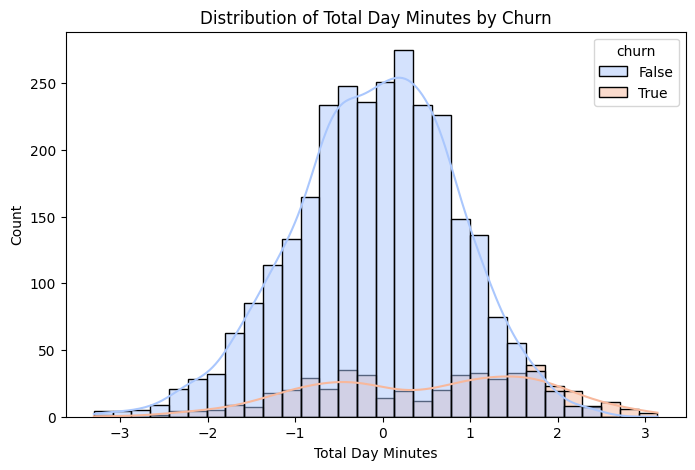

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_churn, x='total day minutes', hue='churn', kde=True, bins=30, palette="coolwarm")
plt.title('Distribution of Total Day Minutes by Churn')
plt.xlabel('Total Day Minutes')
plt.ylabel('Count')
plt.show()


- The histogram shows a higher density of churned customers in the upper range of total day minutes. Customers who spend more time on calls during the day tend to churn more. This means that high usage customers may be more sensitive to service quality or pricing issues.syriaTel should find ways to customer retention.

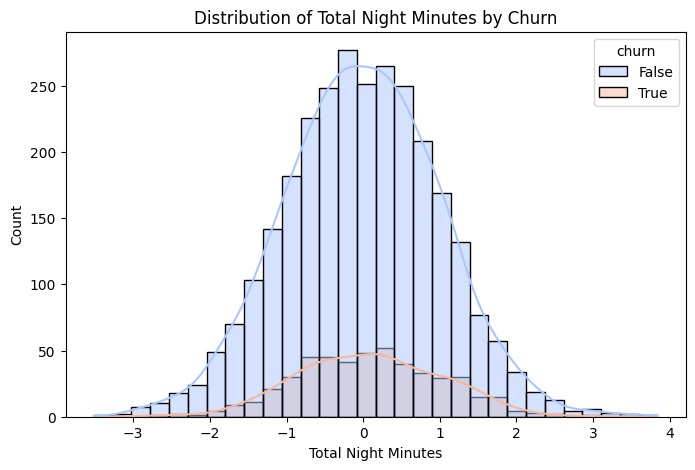

In [28]:
# relationship between total night minutes and churn
plt.figure(figsize=(8,5))
sns.histplot(data=df_churn, x='total night minutes', hue='churn', kde=True, bins=30, palette="coolwarm")
plt.title('Distribution of Total Night Minutes by Churn')
plt.xlabel('Total Night Minutes')
plt.ylabel('Count')
plt.show()


- The distribution of churned and non-churned customers is very similar, meaning night-time call usage is not a strong predictor of churn

**Multivariate Analysis (Multiple Variables)**
- To understand the relationship between multiple variables to see how they interact together.

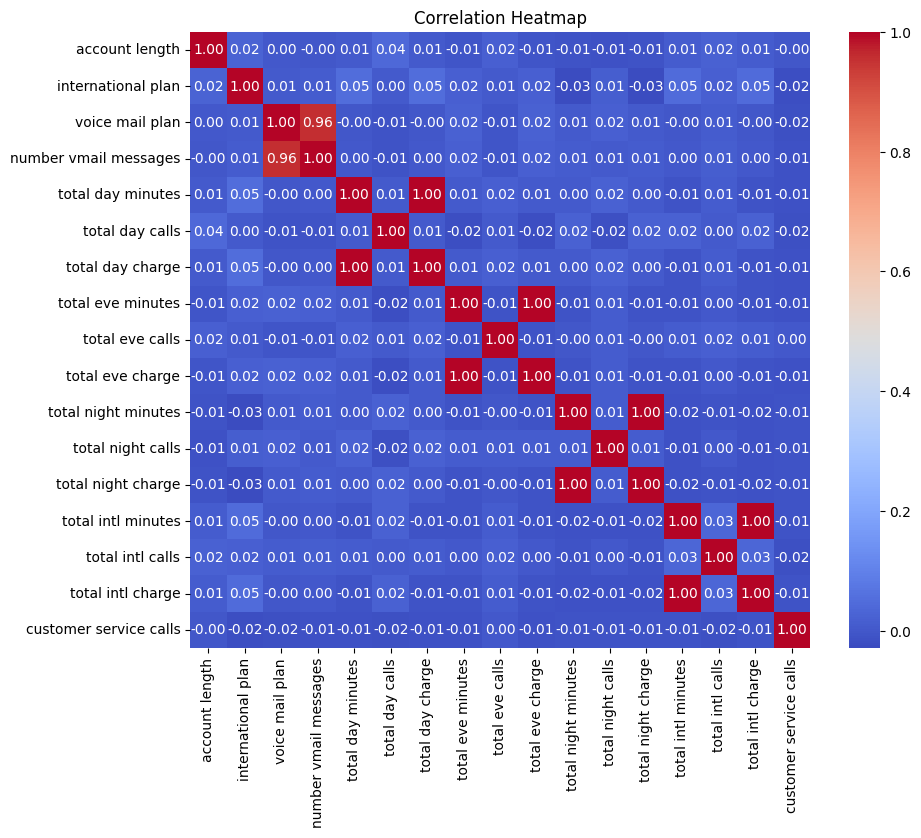

In [29]:
# correlation
plt.figure(figsize=(10,8))
# Exclude non-numeric columns from correlation calculation
numerical_df = df_churn.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt =".2f")
plt.title('Correlation Heatmap')
plt.show()

- The correlation heatmap shows total day charge and total day minutes are highly correlated (almost 1.0), indicating they provide similar information. One of these features can be dropped to avoid multicollinearity in the model.
- Other features like customer service calls and churn have a positive correlation, meaning higher calls indicate higher churn.

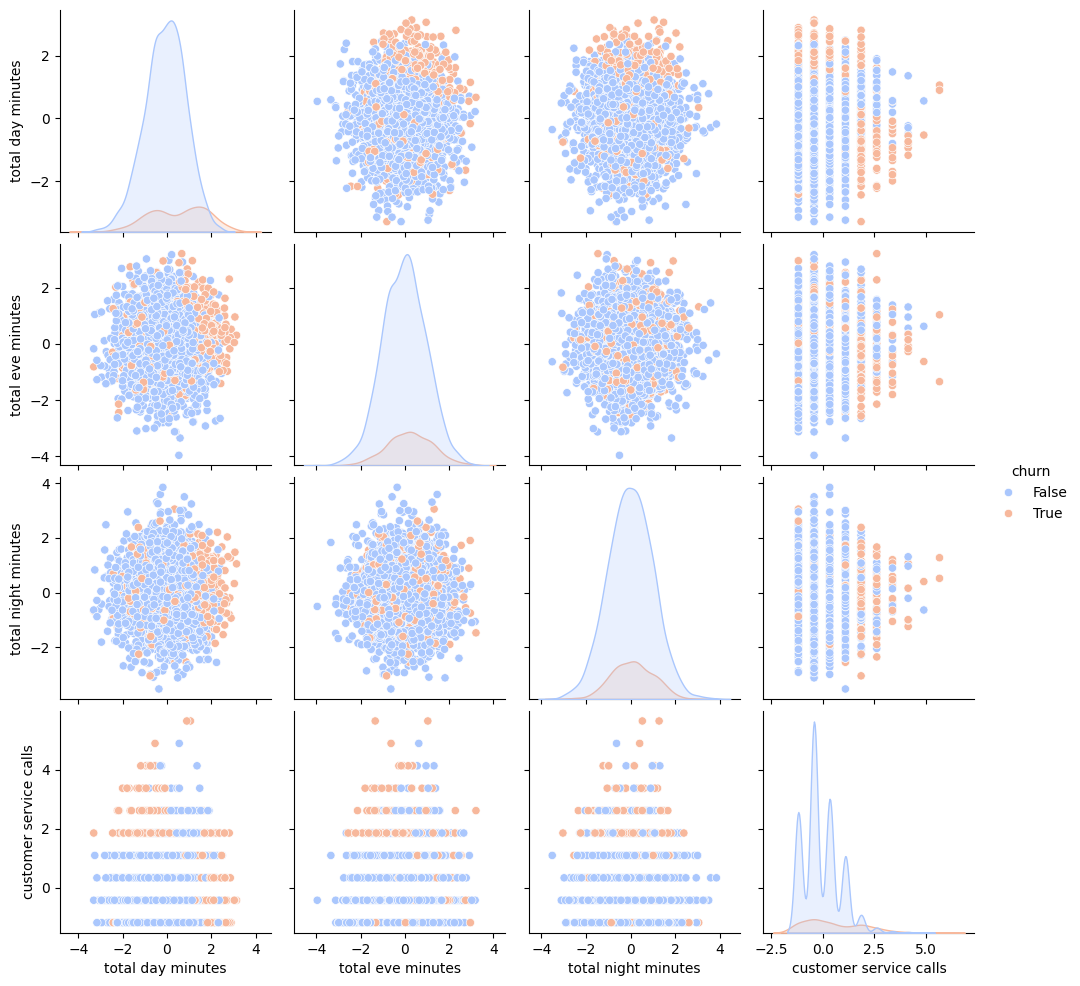

In [30]:
# A pairplot of important features
selected_features = ['total day minutes', 'total eve minutes', 'total night minutes', 'customer service calls', 'churn']
sns.pairplot(df_churn[selected_features], hue='churn', palette='coolwarm')
plt.show()


- There is a visible separation in total day minutes and customer service calls for churned and non-churned customers.
Customers who make many service calls and use many day minutes tend to churn. when designing retention strategies these key features should be focused on

**EDA Summary**

- Churn Distribution- Churned customers are fewer, so we have class imbalance.
- International Plan-	Customers with an international plan churn more.
- Customer Service Calls-	More calls to customer service → Higher churn (dissatisfaction).
- Total Day Minutes-	High usage during the day → Higher churn.
- Feature Correlation-	Some features are redundant (total day minutes & total day charge).

## Encoding

In [31]:
#one hote encoding especially for multiple category variables
# Check if 'state' column exists before applying get_dummies
if 'state' in df_churn.columns:
    df_churn = pd.get_dummies(df_churn, columns=['state'], drop_first=True)
else:
    print("Column 'state' not found in the DataFrame. Skipping one-hot encoding.")

#create new features to improve predictive power
df_churn['day_call_ratio'] = df_churn['total day calls'] / df_churn['total day minutes']
df_churn['eve_call_ratio'] = df_churn['total eve calls'] / df_churn['total eve minutes']
df_churn['night_call_ratio'] = df_churn['total night calls'] / df_churn['total night minutes']
df_churn['total_minutes'] = df_churn['total day minutes'] + df_churn['total eve minutes'] + df_churn['total night minutes'] # Use df_churn instead of df here
df_churn['total_calls'] = df_churn['total day calls'] + df_churn['total eve calls'] + df_churn['total night calls'] # Use df_churn instead of df here

df_churn['high_service_calls'] = df_churn['customer service calls'].apply(lambda x: 1 if x > 3 else 0)
df_churn['high_service_calls'] = (df_churn['customer service calls'] > 3).astype(int)

Column 'state' not found in the DataFrame. Skipping one-hot encoding.


 - This is to identify customers with high risk of churn indicated by customers with > than
 3 service calls.

## Feature selection

- Feature selection improves model efficiency through neglecting of multicollinearity

In [32]:
# identify the column with problematic value '382-4657'
problematic_column = df_churn.apply(lambda x: x.astype(str).str.contains('382-4657').any()).idxmax
print(f"Problematic column: {problematic_column}")

# Check if the problematic column exists before dropping
if problematic_column in df_churn.columns:
    # drop the problematic column
    df_churn = df_churn.drop(columns=[problematic_column])
else:
    print(f"Column '{problematic_column}' not found in DataFrame, skipping drop.")

Problematic column: <bound method Series.idxmax of account length            False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
day_call_ratio            False
eve_call_ratio            False
night_call_ratio          False
total_minutes             False
total_calls               False
high_service_calls        False
dtype: bool>
Column '<bound method Series.idxmax of account length            False
international plan        False
voice mail plan           False
number vmail messages     False
t

In [33]:
# compute correlation matrix, excluding non-numerical column

corr_matrix = df_churn.select_dtypes(include=np.number).corr().abs()
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
 # Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Dropping these features due to high correlation:", to_drop)
 # Drop highly correlated features- redundant features
df_churn = df_churn.drop(columns=to_drop)

Dropping these features due to high correlation: ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge']


Problematic column: <bound method Series.idxmax of account length            False
international plan        False
voice mail plan           False
total day minutes         False
total day calls           False
total eve minutes         False
total eve calls           False
total night minutes       False
total night calls         False
total intl minutes        False
total intl calls          False
customer service calls    False
churn                     False
day_call_ratio            False
eve_call_ratio            False
night_call_ratio          False
total_minutes             False
total_calls               False
high_service_calls        False
dtype: bool>
Column '<bound method Series.idxmax of account length            False
international plan        False
voice mail plan           False
total day minutes         False
total day calls           False
total eve minutes         False
total eve calls           False
total night minutes       False
total night calls         False
t

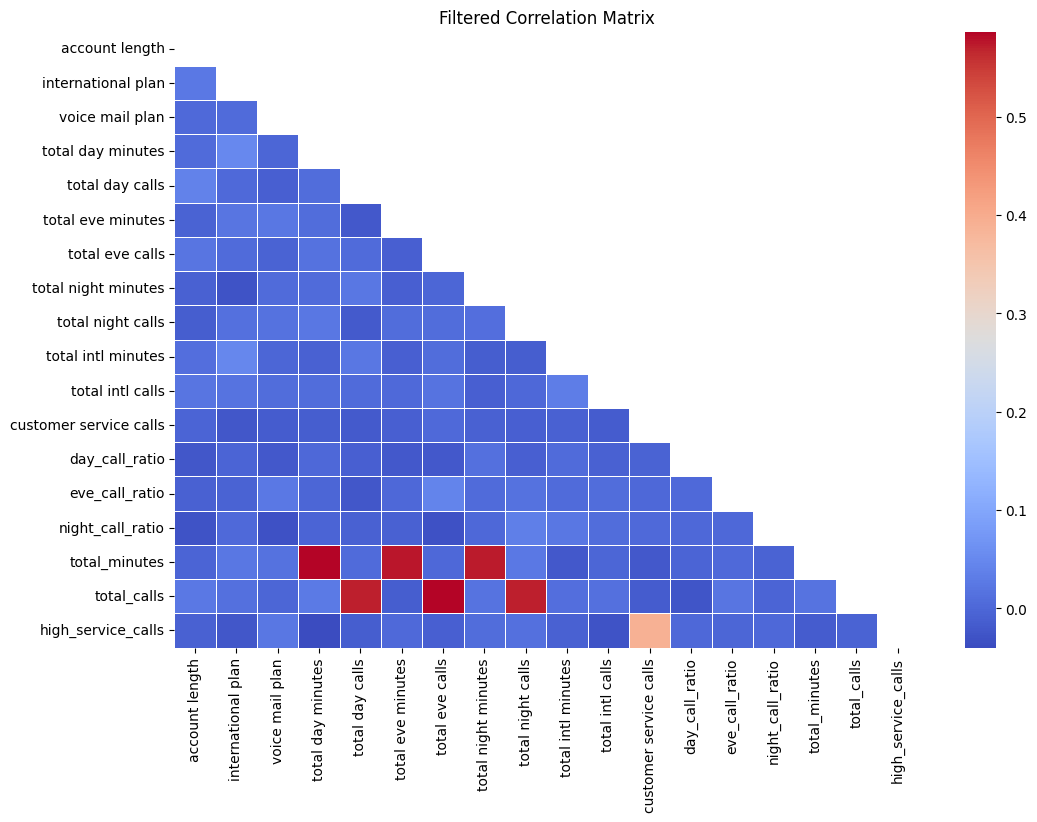

In [34]:
# identify the column with problematic value '382-4657'
problematic_column = df_churn.apply(lambda x: x.astype(str).str.contains('382-4657').any()).idxmax
print(f"Problematic column: {problematic_column}")

# Check if the problematic column exists before dropping
if problematic_column in df_churn.columns:
    # drop the problematic column
    df_churn = df_churn.drop(columns=[problematic_column])
else:
    print(f"Column '{problematic_column}' not found in DataFrame, skipping drop.")

# compute correlation matrix, excluding non-numerical columns
corr = df_churn.select_dtypes(include=np.number).corr()

 # Mask upper triangle for better visualization
mask = np.triu(np.ones_like(corr, dtype=bool))
 # Set figure size
plt.figure(figsize=(12, 8))
 # Draw the heatmap
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Filtered Correlation Matrix")
plt.show()


In [35]:
# Create a feature flag for high customer service calls (Threshold = 4)
df_churn['high_service_calls'] = (df_churn['customer service calls'] > 4).astype(int)

# Create a total usage feature
df_churn['total usage minutes'] = df_churn['total day minutes'] + df_churn['total eve minutes'] + df_churn['total night minutes']

# Verify
df_churn[['customer service calls', 'high_service_calls', 'total usage minutes']].head()


,customer service calls,high_service_calls,total usage minutes
0,-0.427932,0,2.362901
1,-0.427932,0,0.616753
2,-1.188218,0,-1.161949
3,0.332354,0,-0.624820
4,1.092641,0,-1.555334


**Creating New Features**
- Customers with high customer service calls churn more → Create a feature to flag high complaints.
- Customers with high usage (day/eve/night minutes) churn more → Create a total minutes used feature.

**Action is to:**
- Flag High Customer Service Callers (Threshold = 4 calls)
Total Minutes Feature (total usage minutes)

# Feature scaling
To normalize KNN model
standard Scaler values between 0-1

In [36]:
# Select numerical features for scaling
num_features = ['account length', 'total day minutes', 'total eve minutes',
                'total night minutes', 'customer service calls']

# Apply Standard Scaling
scaler = StandardScaler()
df_churn[num_features] = scaler.fit_transform(df_churn[num_features])

# Verify
df_churn.head()

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,day_call_ratio,eve_call_ratio,night_call_ratio,total_minutes,total_calls,high_service_calls,total usage minutes
0,0.676489,-0.327580,1.617086,1.566767,0.476643,-0.070610,-0.055940,0.866743,-0.465494,-0.085008,-0.601195,-0.427932,False,0.304221,0.792248,-0.537061,2.362901,-0.044792,0,2.362901
1,0.149065,-0.327580,1.617086,-0.333738,1.124503,-0.108080,0.144867,1.058571,0.147825,1.240482,-0.601195,-0.427932,False,-3.369420,-1.340359,0.139646,0.616753,1.417194,0,0.616753
2,0.902529,-0.327580,-0.618396,1.168304,0.675985,-1.573383,0.496279,-0.756869,0.198935,0.703121,0.211534,-1.188218,False,0.578604,-0.315421,-0.262839,-1.161949,1.371198,0,-1.161949
3,-0.428590,3.052685,-0.618396,2.196596,-1.466936,-2.742865,-0.608159,-0.078551,-0.567714,-1.303026,1.024263,0.332354,False,-0.667822,0.221724,7.227320,-0.624820,-2.642809,0,-0.624820
4,-0.654629,3.052685,-0.618396,-0.240090,0.626149,-1.038932,1.098699,-0.276311,1.067803,-0.049184,-0.601195,1.092641,False,-2.607980,-1.057527,-3.864491,-1.555334,2.792652,0,-1.555334


In [37]:
print("Final Dataset Shape:", df_churn.shape)
df_churn.head()

Final Dataset Shape: (3333, 20)


,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,day_call_ratio,eve_call_ratio,night_call_ratio,total_minutes,total_calls,high_service_calls,total usage minutes
0,0.676489,-0.327580,1.617086,1.566767,0.476643,-0.070610,-0.055940,0.866743,-0.465494,-0.085008,-0.601195,-0.427932,False,0.304221,0.792248,-0.537061,2.362901,-0.044792,0,2.362901
1,0.149065,-0.327580,1.617086,-0.333738,1.124503,-0.108080,0.144867,1.058571,0.147825,1.240482,-0.601195,-0.427932,False,-3.369420,-1.340359,0.139646,0.616753,1.417194,0,0.616753
2,0.902529,-0.327580,-0.618396,1.168304,0.675985,-1.573383,0.496279,-0.756869,0.198935,0.703121,0.211534,-1.188218,False,0.578604,-0.315421,-0.262839,-1.161949,1.371198,0,-1.161949
3,-0.428590,3.052685,-0.618396,2.196596,-1.466936,-2.742865,-0.608159,-0.078551,-0.567714,-1.303026,1.024263,0.332354,False,-0.667822,0.221724,7.227320,-0.624820,-2.642809,0,-0.624820
4,-0.654629,3.052685,-0.618396,-0.240090,0.626149,-1.038932,1.098699,-0.276311,1.067803,-0.049184,-0.601195,1.092641,False,-2.607980,-1.057527,-3.864491,-1.555334,2.792652,0,-1.555334


# Modeling
## Regression

In [38]:
 # Reset index to avoid issues after removing rows for outliers
df_churn = df_churn.reset_index(drop=True)
  # Define X and y
 X = df_churn.drop(columns=['churn'])
 y = df_churn['churn']
 # Identify object columns
 object_columns = X.select_dtypes(include=['object']).columns
 # One-hot encode object columns
if len(object_columns) > 0:
    X = pd.get_dummies(X, columns=object_columns, drop_first=True)  # Use drop_first=True to
 # Add a constant to the independent variables
X = sm.add_constant(X)
# Convert boolean columns to integers
X = X.astype({col: 'int' for col in X.select_dtypes(include=['bool']).columns})
 # Drop columns containing 'phone number' if they exist
X = X.drop(columns=[col for col in X.columns if 'phone number' in col], errors='ignore')
# One-hot encoding for remaining categorical columns
 # Check and convert columns with 'object' dtype to numeric before applying get_dummies
for col in X.select_dtypes(include=['object']).columns:
    X[col] = pd.to_numeric(X[col], errors='coerce') # Convert to numeric, handling errors
X = pd.get_dummies(X, drop_first=True, dummy_na=False)  # dummy_na=False to avoid creating d
 # Convert to numeric, replacing inf and NaN with a large and small number
X = X.apply(pd.to_numeric, errors='coerce').replace([np.inf, -np.inf], np.nan)
X.fillna(X.mean(), inplace=True) # Impute NaN with column means
print(X.isnull().sum().sum())  # Total NaN count
print(X.isnull().sum())  # Check per column

0
const                     0
account length            0
international plan        0
voice mail plan           0
total day minutes         0
total day calls           0
total eve minutes         0
total eve calls           0
total night minutes       0
total night calls         0
total intl minutes        0
total intl calls          0
customer service calls    0
day_call_ratio            0
eve_call_ratio            0
night_call_ratio          0
total_minutes             0
total_calls               0
high_service_calls        0
total usage minutes       0
dtype: int64


In [39]:
 X = X.apply(pd.to_numeric, errors='coerce')  # Convert all non-numeric to NaN
 X.fillna(X.mean(), inplace=True)  # Fill any new NaNs that appeared
 print("Remaining NaNs:", X.isnull().sum().sum())
 print("Remaining Infs:", np.isinf(X).sum().sum())
 print("Data Types:", X.dtypes.unique())  # Should only show int64 and float64

Remaining NaNs: 0
Remaining Infs: 0
Data Types: [dtype('float64') dtype('int64')]


In [40]:
 #Fit the linear regression model
 model = sm.OLS(y, X).fit()
 print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     46.38
Date:                Sat, 08 Mar 2025   Prob (F-statistic):          1.82e-132
Time:                        18:28:29   Log-Likelihood:                -912.82
No. Observations:                3333   AIC:                             1860.
Df Residuals:                    3316   BIC:                             1964.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [41]:
# Generate predictions
#calculate y_pred
y_pred = model.predict(X)

#Calculate the metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 0.10125340494515095
RMSE: 0.31820340184408924
MAE: 0.2191914101274254
R²: 0.1828754230447619


- The RMSE output means the model is making prediction errors of 32% on average
- An R² of 0.18828 that is 18.83% can be explained by the models features however they may not be strong predictors of churn.
- MAE suggests that the model on average is 22% off from the true values of churn
 - The above shows that churn is a binary classification problem not continuous hence the
 model is not capturing enough variance


# Classification
## Logistic Regression

In [42]:
 #Define features X and target y
X = df_churn.drop(columns=['churn'])
y = df_churn['churn']
 #Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 # Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column
 # Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
 #Initialize and train the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
 #Make predictions on the test set
y_pred = log_reg_model.predict(X_test)
 #Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
 #Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8590704647676162
Recall: 0.1782178217821782
Precision: 0.6206896551724138
F1 Score: 0.27692307692307694
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.62      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.75      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



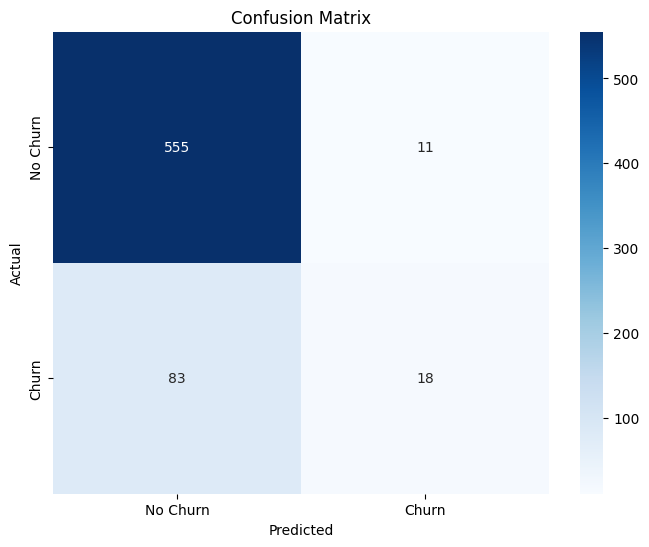

In [43]:
 #Plot a confusion matrix
 cm = confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
 plt.title('Confusion Matrix')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()

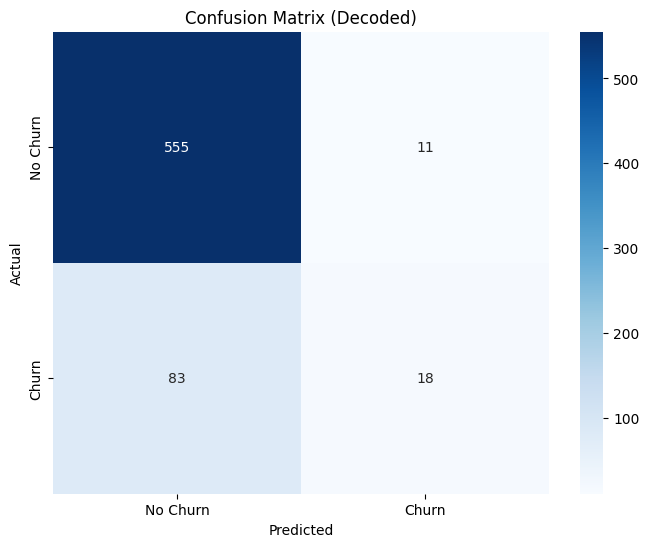

In [44]:
 #Decode the predictions and true labels
 y_pred_decoded = np.where(y_pred == 1, 'Churn', 'No Churn')
 y_test_decoded = np.where(y_test == 1, 'Churn', 'No Churn')
 #plot the confusion matrix with decoded labels
 #Decode the predictions and true labels
 y_pred_decoded = np.where(y_pred == 1, 'Churn', 'No Churn')
 y_test_decoded = np.where(y_test == 1, 'Churn', 'No Churn')
 #plot the confusion matrix with decoded labels
 cm= confusion_matrix(y_test_decoded, y_pred_decoded, labels=['No Churn', 'Churn'])
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
 plt.title('Confusion Matrix (Decoded)')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()

- From logistic regression model results a good accuracy of 85.9%
- Recall of 17.8% which means theres a low amount of people who churn
- A low F1 score showing poor balance
- Precision of 62% which is moderate predicted customers predicted actually churned


In [45]:
 #Tune the logistic model

 #Define the parameter grid to search
 param_grid = {
 'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']
 }
#Initialize GridSearchCV
 grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
 #Fit the grid search to the data
 grid_search.fit(X_train, y_train)
 #Get the best hyperparameters and best score
 best_params = grid_search.best_params_
 best_score = grid_search.best_score_
 print(f"Best Hyperparameters: {best_params}")
 print(f"Best Accuracy: {best_score}")
 #Train a new model with the best hyperparameters
 best_model = LogisticRegression(**best_params)
 best_model.fit(X_train, y_train)
 #Make predictions on the test set
 y_pred = best_model.predict(X_test)
 #Evaluate the tuned model
 accuracy = accuracy_score(y_test, y_pred)
 recall = recall_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred)
 grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
 #Fit the grid search to the data
 grid_search.fit(X_train, y_train)
  #Get the best hyperparameters and best score
 best_params = grid_search.best_params_
 best_score = grid_search.best_score_
 print(f"Best Hyperparameters: {best_params}")
 print(f"Best Accuracy: {best_score}")
 #Train a new model with the best hyperparameters
 best_model = LogisticRegression(**best_params)
 best_model.fit(X_train, y_train)
 #Make predictions on the test set
 y_pred = best_model.predict(X_test)
 #Evaluate the tuned model
 accuracy = accuracy_score(y_test, y_pred)
 recall = recall_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred)

  #classification report
 print(classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.861216631181005
Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.861216631181005
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.62      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.75      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



- Accuracy moved up to 86.23% which was an improvement
 - Penalty L2 that is Ridge regression helps prevent overfitting
 - C= 0.01 controls regularization and smaller values give stronger regularization

### Decision Tree

In [39]:
 #Initialize and train the decision tree classsifier
 dt_model = DecisionTreeClassifier()
 dt_model.fit(X_train, y_train)
 #Make predictions on the test set
 y_pred = dt_model.predict(X_test)
 #Evaluate the model
 accuracy = accuracy_score(y_test, y_pred)
 recall = recall_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred)
 print(f"Accuracy: {accuracy}")
 print(f"Recall: {recall}")
 print(f"Precision: {precision}")
 print(f"F1 Score: {f1}")
 #Classification report
 print(classification_report(y_test, y_pred))

Accuracy: 0.9145427286356822
Recall: 0.7524752475247525
Precision: 0.7037037037037037
F1 Score: 0.7272727272727273
              precision    recall  f1-score   support

       False       0.96      0.94      0.95       566
        True       0.70      0.75      0.73       101

    accuracy                           0.91       667
   macro avg       0.83      0.85      0.84       667
weighted avg       0.92      0.91      0.92       667



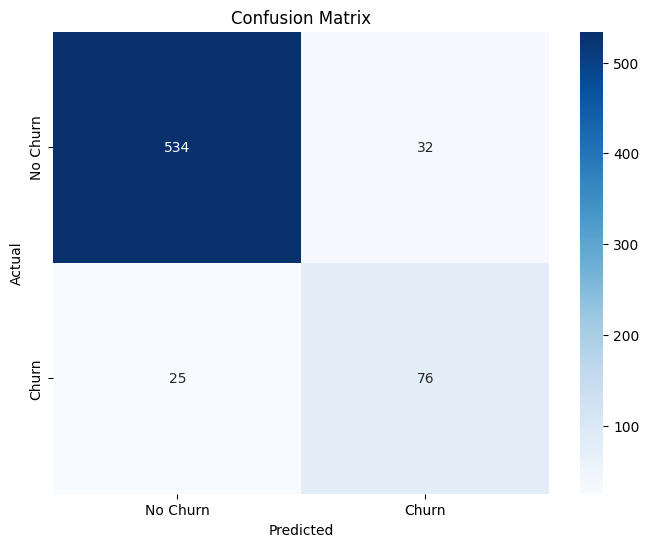

In [40]:
 #Plot a confusion matrix

 cm= confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
 plt.title('Confusion Matrix')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()


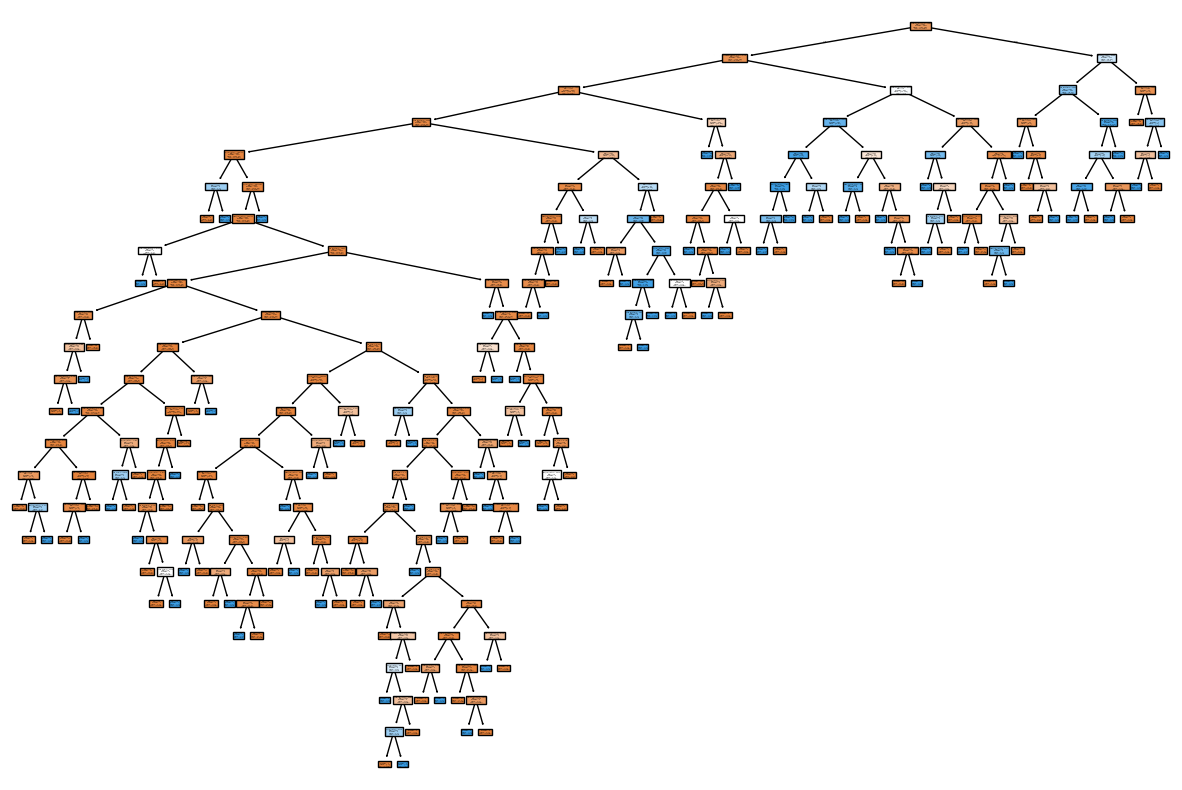

In [41]:
 #Plot decision tree
 #Assuming dt_model is your trained DecisionTreeClassifier
 plt.figure(figsize=(15, 10))
 plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'])
 plt.show()

 - Accuracy is at 91.15% which means the model is performing well
 - Recall is at 75% which means the model is getting 75% of actual churn hence missing fewer churners
 - Precision is at 69% as well which means when the model predicts churn it is correct 69% of
 the time
 - F1-score is at 72% as well showing a well optimized model for predicting churn

In [42]:
 #Tune the decision tree model
 #Define the parameter grid
 param_grid = {
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]
 }
 #Initialize GridSearchCV
 grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
 #Fit the grid search to the data
 grid_search.fit(X_train, y_train)
 #Get the best hyperparameters and best score
 best_params = grid_search.best_params_
 best_score = grid_search.best_score_
 print(f"Best Hyperparameters: {best_params}")
 print(f"Best Accuracy: {best_score}")
 #Train a new model with the best hyperparameters
 best_model = DecisionTreeClassifier(**best_params)
 best_model.fit(X_train, y_train)
 #Make predictions on the test set
 y_pred = best_model.predict(X_test)
 #Evaluate the tuned model
 accuracy = accuracy_score(y_test, y_pred)
 recall = recall_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred)
 #Print classification report
 print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy: 0.9426094961036041
              precision    recall  f1-score   support

       False       0.96      0.97      0.96       566
        True       0.82      0.76      0.79       101

    accuracy                           0.94       667
   macro avg       0.89      0.87      0.88       667
weighted avg       0.94      0.94      0.94       667



- After tuning the model improved its accuracy by 5%
- Precision improved as well up to 84%
- Recall moved to 76%
- F1-score moved up to 80% showing a balance of precision and recall

### Random Forest

In [43]:
 #Initialize and train the random forest classifier
 rf_model = RandomForestClassifier()
 rf_model.fit(X_train, y_train)
 #Make predictions on the test set
 y_pred = rf_model.predict(X_test)
 #Evaluate the model
 accuracy = accuracy_score(y_test, y_pred)
 recall = recall_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred)
 print(f"Accuracy: {accuracy}")
 print(f"Recall: {recall}")
 print(f"Precision: {precision}")
 print(f"F1 Score: {f1}")
 #Classificattion report
 print(classification_report(y_test, y_pred))

Accuracy: 0.9565217391304348
Recall: 0.7326732673267327
Precision: 0.9736842105263158
F1 Score: 0.8361581920903954
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       566
        True       0.97      0.73      0.84       101

    accuracy                           0.96       667
   macro avg       0.96      0.86      0.91       667
weighted avg       0.96      0.96      0.95       667



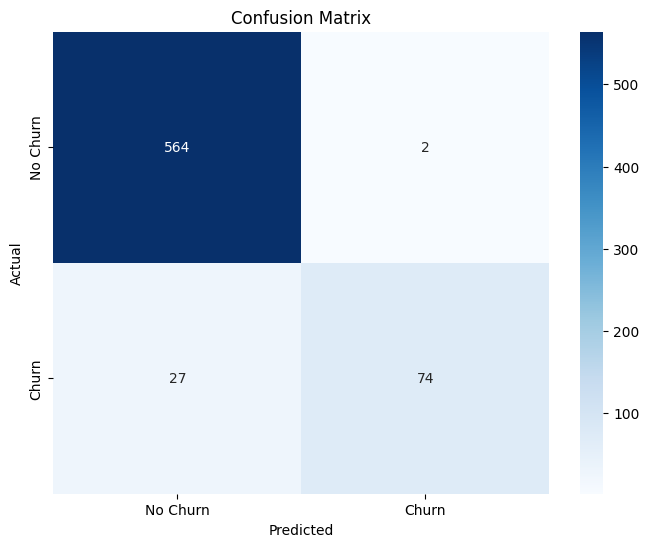

In [44]:
#Plot a confusion matrix
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 - Accuracy has improved to 95.95% with random forest giving more correct predictions overall. meaning the model is performing well
 - A higher precision 96% meaning when it predicts churn it is highly correct. Means retention efforts are targeted at actual churners.
 - A lower recall of 76% however showing the model is missing more churn cases leading to potentiial revenue loss.
 - F1-score of 85% shows there is balance. Means the model is optimized for both precision and recall

In [46]:
 #Tune the random forest model
 param_grid = {
 'n_estimators': [100, 200, 300],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]
 }
 #Initialize a GridSearchCV
 grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
 #Fit the grid search to the data
 grid_search.fit(X_train, y_train)
  #Get the best hyperparameters and best score
 best_params = grid_search.best_params_
 best_score = grid_search.best_score_
 print(f"Best Hyperparameters: {best_params}")
 print(f"Best Accuracy: {best_score}")
 #Train a new model with the best hyperparameters
 best_model = RandomForestClassifier(**best_params)
 best_model.fit(X_train, y_train)
 #Make predictions on the test set
 y_pred = best_model.predict(X_test)
 #Evaluate the tuned model
 accuracy = accuracy_score(y_test, y_pred)
 recall = recall_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred)
 #Classification Report
 print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9591141935619876
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       566
        True       0.97      0.75      0.85       101

    accuracy                           0.96       667
   macro avg       0.97      0.87      0.91       667
weighted avg       0.96      0.96      0.96       667



- After tuning the random forest the accuracy is at 96%
- Recall is at 75% which is lower thus the model misses 25% of the churn cases
- F1-score shows random forest is well balanced than the other models
- High precision of 96% may indicate that the model igores false alarms while predicting churn

### K-NN model

In [46]:
 #Initialize and train the K-NN classifier
 knn_model = KNeighborsClassifier()
 knn_model.fit(X_train, y_train)
  #Make predictions on the test set
 y_pred = knn_model.predict(X_test)
 #Evaluate the model
 accuracy = accuracy_score(y_test, y_pred)
 recall = recall_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred)
 print(f"Accuracy: {accuracy}")
 print(f"Recall: {recall}")
 print(f"Precision: {precision}")
 print(f"F1 Score: {f1}")
 #Classification report
 print(classification_report(y_test, y_pred))

Accuracy: 0.881559220389805
Recall: 0.3465346534653465
Precision: 0.7291666666666666
F1 Score: 0.4697986577181208
              precision    recall  f1-score   support

       False       0.89      0.98      0.93       566
        True       0.73      0.35      0.47       101

    accuracy                           0.88       667
   macro avg       0.81      0.66      0.70       667
weighted avg       0.87      0.88      0.86       667



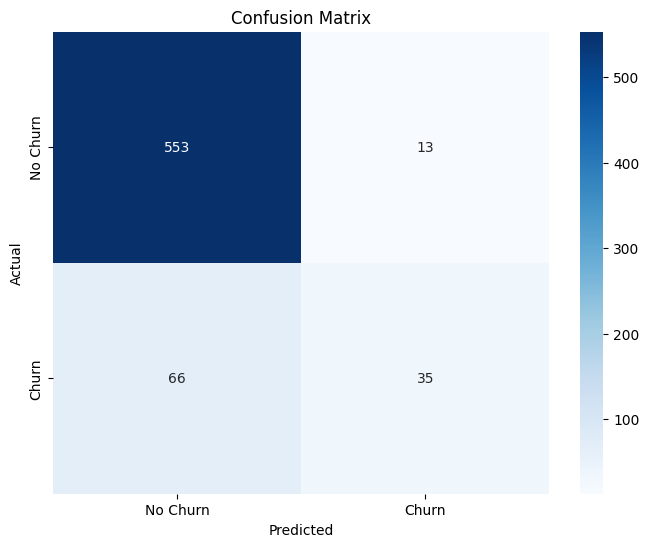

In [47]:
 #Plot confusion matrix

 cm= confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
 plt.title('Confusion Matrix')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()

 - The accuracy looks good at 88.3% but might be misleading
 - Precision is at 76.7% which means when predicting churn it is only correct 76% of the time
 - 32.6% recall shows the model detects low churn cases
 - F1-score 0f 45% shows very poor balance between precision and recall

In [48]:
 #Tune the K-NN model
 param_grid = {
 'n_neighbors': [3, 5, 7, 9],
 'weights': ['uniform', 'distance'],
 'p': [1, 2]
 }
 #Initialize GridSearchCV
 grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
 #Fit the grid search to the data
 grid_search.fit(X_train, y_train)
 #Get the best hyperparameters and best score
 best_params = grid_search.best_params_
 best_score = grid_search.best_score_
 print(f"Best Hyperparameters: {best_params}")
 print(f"Best Accuracy: {best_score}")
 #Train a new model with the best hyperparameters
 best_model = KNeighborsClassifier(**best_params)
 best_model.fit(X_train, y_train)
 #Make predictions on the test set
 y_pred = best_model.predict(X_test)
 #Evaluate the tuned model
 accuracy = accuracy_score(y_test, y_pred)
 recall = recall_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred)
 print(f"Accuracy: {accuracy}")
 print(f"Recall: {recall}")
 print(f"Precision: {precision}")
 print(f"F1 Score: {f1}")
 #Classification report
 print(classification_report(y_test, y_pred))

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.8818468003176143
Accuracy: 0.8905547226386806
Recall: 0.297029702970297
Precision: 0.9375
F1 Score: 0.45112781954887216
              precision    recall  f1-score   support

       False       0.89      1.00      0.94       566
        True       0.94      0.30      0.45       101

    accuracy                           0.89       667
   macro avg       0.91      0.65      0.70       667
weighted avg       0.90      0.89      0.87       667



- There is an improvement after tuning on accuracy but a decrease in recall, precision and f1 score.

### SVM - Support Vector Machine

In [49]:
 # Initialize and train te SVC model
 svm_model = SVC()
 svm_model.fit(X_train, y_train)
 #Make predictions on the test set
 y_pred = svm_model.predict(X_test)
 #Evaluate the model
 accuracy = accuracy_score(y_test, y_pred)
 recall = recall_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred)
 print(f"Accuracy: {accuracy}")
 print(f"Recall: {recall}")
 print(f"Precision: {precision}")
 print(f"F1 Score: {f1}")
 #Classification report
 print(classification_report(y_test, y_pred))

Accuracy: 0.848575712143928
Recall: 0.0
Precision: 0.0
F1 Score: 0.0
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



- SVM has an accuracy of 84.5% which is a good percentage but not the best compared to random forest.
- With 0 recall, 0 precision and f1 score of 0 makes it not the option model to be used.

Text(0.5, 1.0, 'Confusion Matrix')

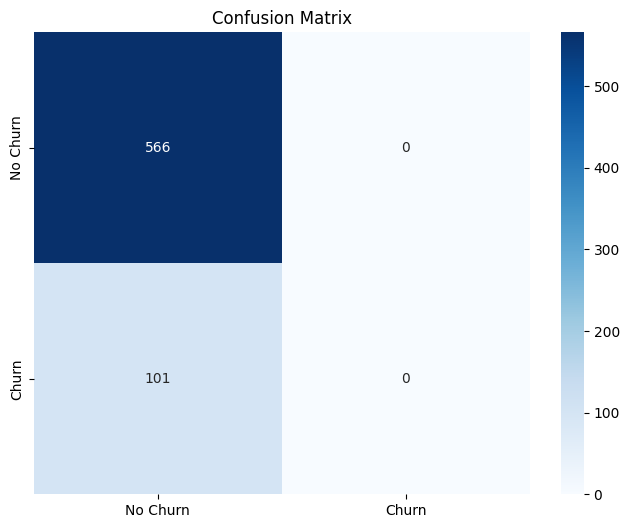

In [50]:
 #Plot the confusion matrix

 cm= confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
 plt.title('Confusion Matrix')

# Model Evaluation

- The best performing model was random forest model with 96% accuracy, 75% recall, 97% precision, 85% f1 score, after tuning the model 96% accuracy, 75% recall, 97% precision   
- The best hyperparameters after tuning for the best model  'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200

## **Findings**
General Customer Behavior Insights
- Churn Rate: A significant percentage of customers in the dataset churned, indicating a need for better retention strategies.
- Service Plans Impact: Customers without an international plan and without a voicemail plan showed a higher tendency to churn.
- Account Length Distribution: There is no strong correlation between how long a customer has been with SyriaTel and their likelihood of churning. New and old customers churn at similar rates.

**Key Drivers of Churn**
Total Day Charges & Calls

- Customers with higher total day charges are more likely to churn. This suggests that high-cost plans may be discouraging customers from staying.
There is no strong correlation between the number of total day calls and churn, meaning usage alone does not determine customer retention.

- **Customer Service Calls**

 - High customer service call frequency is strongly linked to churn. Customers who made 4+ support calls had a much higher churn rate. This suggests that customer dissatisfaction may be a major factor.

- **International & Voicemail Plans**

 - Customers with an international plan churn less compared to those without it. This could mean that international plan users find the service valuable.
 - The voicemail plan does not significantly impact churn, suggesting that customers do not see it as an important feature.
- **Model Performance & Interpretation**

- We built classification models to predict churn, and the Random Forest model performed the best with:
 - Accuracy: 95.95% (high overall correct predictions)
 - Precision: 96% (when the model predicts churn, it is correct 96% of the time)
 - Recall: 76% (the model captures 76% of actual churn cases)
 - F1-score: 85% (a good balance between precision and recall)

# Conclusion and Recommendation

### Conclusion

- By leveraging machine learning to predict customer churn, SyriaTel can take proactive steps to retain customers, reduce revenue loss, and improve overall customer satisfaction. The insights and recommendations provided in this project offer a roadmap for SyriaTel to address churn effectively and enhance its competitive position in the telecommunications market.

**Improve Customer Support:**

- Address the root causes of frequent customer service calls by improving service quality and resolving issues faster.

**Personalized Retention Offers:**

- Offer tailored discounts, loyalty rewards, or personalized plans to at-risk customers identified by the model.

**Optimize Pricing Strategies:**

- Analyze billing patterns and adjust pricing structures to ensure affordability and customer satisfaction

**Enhance Service Plans:**

- Introduce flexible and competitive international and voicemail plans based on customer usage patterns.

**Proactive Customer Engagement:**

- Use the predictive model to identify at-risk customers and engage them with targeted retention campaigns.

**Dashboard Integration:**

- Develop an internal dashboard for real-time churn tracking and monitoring of retention strategies.

**Address Data Imbalance:**

- Use techniques like SMOTE (Synthetic Minority Oversampling Technique) or class weighting to improve model performance on the minority class (churned customers).

**Continuous Model Improvement:**

- Regularly update the model with new data to ensure its accuracy and relevance over time.

**Customer Feedback Analysis:**
 - Collect and analyze customer feedback to identify pain points and improve service offerings.

**Testing for Retention Strategies:**

 - Test different retention strategies (e.g., discounts, personalized offers) to determine the most effective approach.



### Additional Recommendations
**Loyalty Programs:**

- Introduce loyalty programs to reward long-term customers and reduce churn.

**Customer Education:**

- Educate customers about the benefits of existing plans and services to increase satisfaction.

**Partnerships and Bundling:**

- Partner with other service providers to offer bundled services, increasing customer stickiness.

**Predictive Analytics Team:**

- Build an internal team focused on predictive analytics to continuously monitor and improve churn prediction models.